# Numerical analysis of ergodicity of 1D potentials thermostatted using the DD algorithm

## Harmonic Oscillator

In [1]:
using HDF5
using PyPlot
using PyCall
@pyimport matplotlib as mpl
mpl.style[:use]("ggplot")

In [2]:
#potentialname = "HO"
filename = "histig3cHO"
data = readdlm("../data/$filename");

In [4]:
q = data[:,1]
rhoq = data[:,2]
p = data[:,3]
rhop = data[:,4]
z = data[:,5]
rhoz = data[:,6];

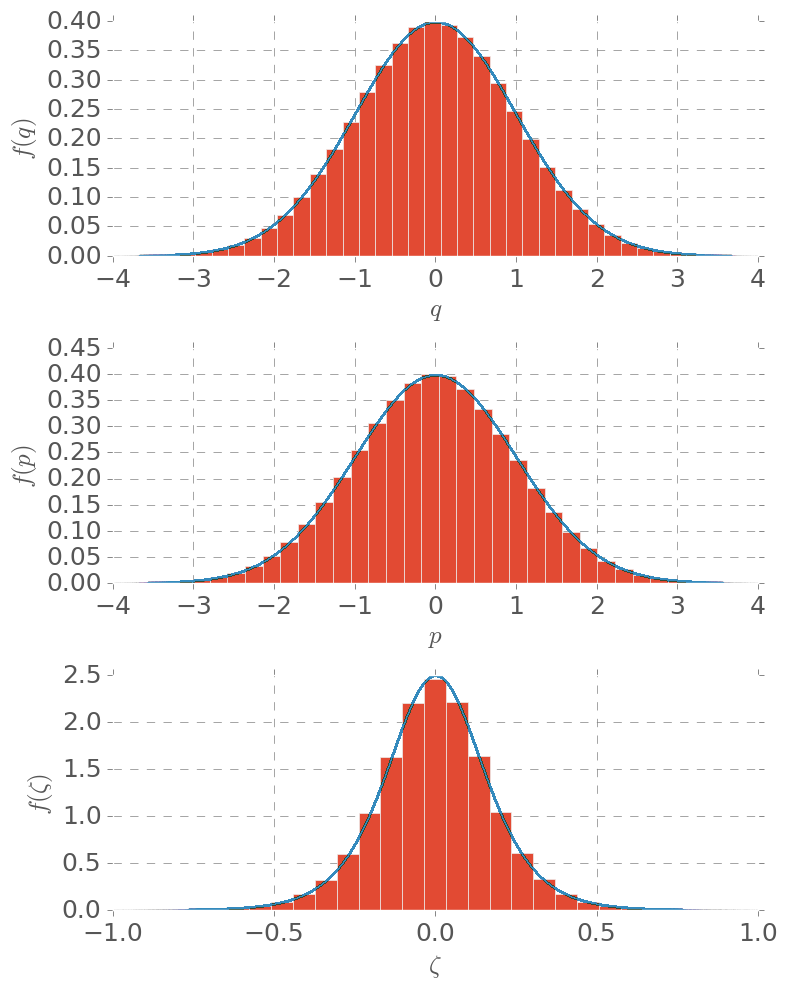

In [10]:
fig = plt[:figure](figsize=(8,10))
#fig[:subplots_adjust](hspace=.5)


ax = fig[:add_subplot](311)
ax[:set_xlabel](L"$q$",fontsize="18")
ax[:set_ylabel](L"$f(q)$",fontsize="18")
ax[:hist](q, 50, normed = 1)
ax[:plot](q,rhoq, ".",ms=0.5)
ax[:set_xlim](-4.0,4.0)
ax[:set_axis_bgcolor]("white")
ticks = collect(0.:0.05:0.4)
ax[:set_yticks](ticks)
ax[:grid](which="both", color = "gray", linestyle = "dashed")
ax[:tick_params](axis="both", labelsize=18)

ax = fig[:add_subplot](312)
ax[:set_xlabel](L"$p$",fontsize="18")
ax[:set_ylabel](L"$f(p)$", fontsize="18")
ax[:hist](p, 50, normed = 1)
ax[:plot](p,rhop, ".",ms=0.5)
ax[:set_xlim](-4.0,4.0)
ax[:set_axis_bgcolor]("white")
#ticks = collect(0.:0.05:0.45)
#ax[:set_yticks](ticks)
ax[:grid](which="both", color = "gray", linestyle = "dashed")
ax[:tick_params](axis="both", labelsize=18)

ax = fig[:add_subplot](313)
ax[:set_xlabel](L"$\zeta$",fontsize="18")
ax[:set_ylabel](L"$f(\zeta)$",fontsize="18")
ax[:hist](z, 50, normed = 1)
ax[:plot](z,rhoz, ".",ms=0.5)
ax[:set_xlim](-1.0,1.0)
ax[:set_axis_bgcolor]("white")
#ticks = collect(0.:0.4:0.5)
#ax2[:set_yticks](ticks)
ax[:grid](which="both", color = "gray", linestyle = "dashed")
ax[:tick_params](axis="both", labelsize=18)

plt[:tight_layout]()

plt[:savefig]("../plots/$filename.png")